In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

data set: https://fred.stlouisfed.org/series/IPN31152N


In [2]:
# CODE HERE
df = pd.read_csv('.../exercise-data.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
df.rename(columns={'DATE':'date','IPN31152N':'production'},inplace=True)
df.set_index('date',inplace=True)
df.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


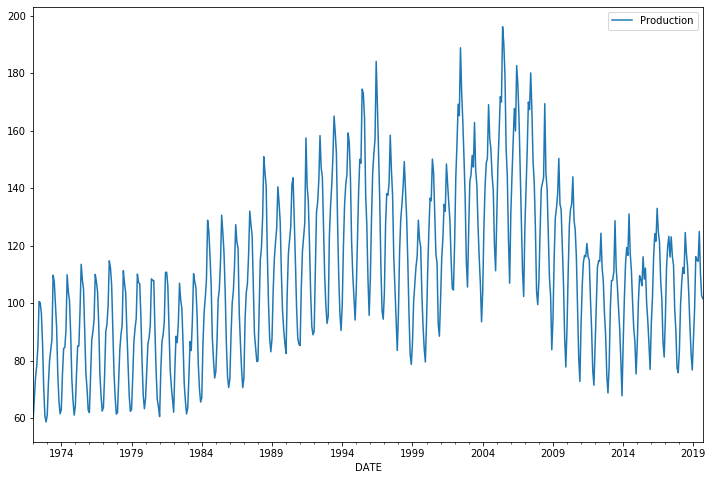

In [9]:
#CODE HERE
df.shape[0]

576

In [10]:
df=df.iloc[:-3]

In [11]:
df.shape[0]

573

In [12]:
train_df = df.iloc[:-24]
test_df = df.iloc[-24:]

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(train_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaled_tr = scaler.transform(train_df)

In [18]:
scaled_ts = scaler.transform(test_df)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
length = 18
n_features = 1

In [21]:
generator = TimeseriesGenerator(scaled_tr,scaled_tr,length=length,batch_size=1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
model =  Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
validation_generator = TimeseriesGenerator(scaled_ts,scaled_ts,batch_size=1,length=length)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val-loss',patience=4)

In [38]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 2/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 3/20
531/531 [==============================] - 14s 27ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 4/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/20
531/531 [==============================] - 13s 25ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 6/20
531/531 [==============================] - 15s 28ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 7/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 8/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 9/20
531/531 [==============================] - 12s 24ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 10/20
531/531 [==============================] - 14s 27ms/step - loss: 0.001

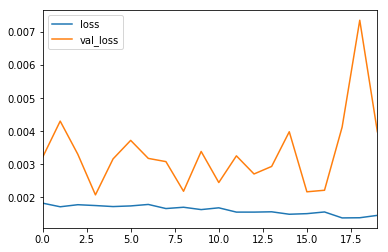

In [39]:
pd.DataFrame(model.history.history).plot()

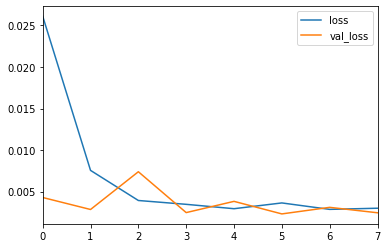

In [48]:
test_predictions=[]


first_eval = scaled_tr[-length:]
current_batch = first_eval.reshape((1,length,n_features))

for i in range(len(test_df)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
true_predictions = scaler.inverse_transform(test_predictions)

In [50]:
len(test_df)

24

In [51]:
len(true_predictions)

24

In [52]:
test_df['prediction'] = true_predictions
test_df

C:\Users\VIVEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,production,prediction
date,,
2017-10-01,90.4732,90.896833
2017-11-01,77.4378,83.832925
2017-12-01,75.8118,86.153257
2018-01-01,83.4343,104.497608
2018-02-01,99.4899,117.792803
2018-03-01,107.3152,126.395528
2018-04-01,112.4309,133.705489
2018-05-01,110.3544,143.515103
2018-06-01,124.5841,147.195694


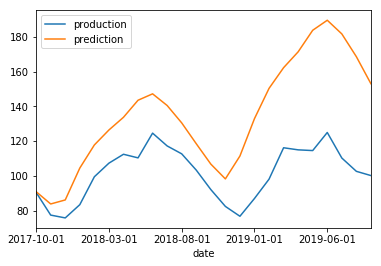

In [53]:
test_df.plot()